In [1]:
! python fredmd/transform.py

--- Démarrage du traitement de fredmd/fredmd.csv ---
Traitement des colonnes...

--- Nettoyage du 'Ragged Edge' (fin de fichier) ---
Suppression de 3 ligne(s) incomplète(s) à la fin du fichier (Ragged Edge).
Lignes restantes : 801

--- Rapport de validité des données ---
(Affiche uniquement les colonnes où des données manquent au-delà de la transformation mathématique)
Colonne 'PERMIT' (Code 4) : Incomplète jusqu'au 1959-12-01. (Valide dès 1960-01-01)
Colonne 'PERMITNE' (Code 4) : Incomplète jusqu'au 1959-12-01. (Valide dès 1960-01-01)
Colonne 'PERMITMW' (Code 4) : Incomplète jusqu'au 1959-12-01. (Valide dès 1960-01-01)
Colonne 'PERMITS' (Code 4) : Incomplète jusqu'au 1959-12-01. (Valide dès 1960-01-01)
Colonne 'PERMITW' (Code 4) : Incomplète jusqu'au 1959-12-01. (Valide dès 1960-01-01)
Colonne 'ACOGNO' (Code 5) : Incomplète jusqu'au 1992-02-01. (Valide dès 1992-03-01)
Colonne 'ANDENOx' (Code 5) : Incomplète jusqu'au 1968-02-01. (Valide dès 1968-03-01)
Colonne 'CP3Mx' (Code 2) : Incomp

# Comparing Models one month ahead forecast between 2013 and 2019

In [2]:
from model import *
import numpy as np

import pandas as pd
data = pd.read_csv('fredmd/nice_fredmd.csv')
data.set_index('sasdate', inplace=True)
data.index = pd.to_datetime(data.index)
data = data[data.index >= "1970"]
data = data[data.index < "2020"]
cols_with_nan = data.columns[data.isna().any()].tolist()
if len(cols_with_nan) > 0:
    print(f"--- {len(cols_with_nan)} Colonnes with NaN to deleate ---")
    for col in cols_with_nan:
        print(f"- {col}")
else:
    print("No NaN detected.")
data = data.dropna(axis=1)

from dataloader import MacroDataLoader

X_col = list(data.columns)
Y_col = ['RPI', 'CPIAUCSL', 'UNRATE', 'GS10']
cfg = {
    'date_col': 'sasdate',
    'country_col': None,
    'target_col': Y_col,
    'features': X_col
}
loader = MacroDataLoader(data, cfg)

models_dict = {
    'RNN': make_builder(RNNModel, base_config=config_rnn, weight_decay=5e-4),
    'NODE': make_builder(LatentNODEModel, base_config=config_node, weight_decay=5e-4),
    'FVAR': build_fvar,
    'ESN': make_builder,
    'OLS-VAR': build_var,
    'Ridge-VAR': build_ridge_cv,
    'RF': build_rf_panel,
    'Minnesota-VAR': build_minnesota_ridge,
}

from evaluator import UniFreqPanelMacroEvaluator

evaluator = UniFreqPanelMacroEvaluator(
    dataloader=loader,
    models_builders=models_dict,
    horizon=1,
    verbose=True,
    metric='rmse'
)

backtest_dates = pd.date_range(start='2013-01', periods=12*6, freq='ME')

results = evaluator.run_backtesting(
    end_train_date_list=backtest_dates,
    num_exp_by_fit=12
)

evaluator.print_significance_tests(results, target_idx=None, horizon_idx=0)

for i in range(len(cfg['target_col'])):
    evaluator.print_significance_tests(results, target_idx=i, horizon_idx=0)

# Plot for horizon > 1
# evaluator.plot_compare_models(results, target_idx=None, title=f"RMSE Forecast Evolution Average")

# for i in range(len(cfg['target_col'])):
#     evaluator.plot_compare_models(results, target_idx=i, title=f"RMSE Forecast Evolution - {cfg['target_col'][i]}")

--- 3 Colonnes with NaN to deleate ---
- ACOGNO
- TWEXAFEGSMTHx
- UMCSENTx
MacroDataLoader initialized: 1 countries, 600 observations, 123 features

Backtesting model: RNN

Backtesting model: NODE

Backtesting model: FVAR

Backtesting model: ESN


TypeError: make_builder() missing 1 required positional argument: 'base_config'

# For covid crisis, between 2020-01 and 2021-10

--- 5 Colonnes with NaN to deleate ---
- ACOGNO
- CP3Mx
- COMPAPFFx
- TWEXAFEGSMTHx
- UMCSENTx
MacroDataLoader initialized: 1 countries, 624 observations, 121 features

Backtesting model: RNN
[RNNModel] Training...
   Real decay: 0.001
   Epoch 20: Loss=0.94234
   Epoch 40: Loss=0.94787
   Epoch 60: Loss=0.89776
   Epoch 80: Loss=0.90021
   Epoch 100: Loss=0.85404
   Epoch 120: Loss=0.86690
   Epoch 140: Loss=0.85571
   Epoch 160: Loss=0.84027
   Epoch 180: Loss=0.84243
   Epoch 200: Loss=0.89398
[RNNModel] Predicting...
[RNNModel] Training...
   Real decay: 0.001
   Epoch 20: Loss=0.88195
   Epoch 40: Loss=0.86976
   Epoch 60: Loss=0.85717
   Epoch 80: Loss=0.86917
   Epoch 100: Loss=1.07681
   Epoch 120: Loss=0.85343
   Epoch 140: Loss=0.86639
   Epoch 160: Loss=0.86332
   Epoch 180: Loss=0.87511
   Epoch 200: Loss=0.87206
[RNNModel] Predicting...

Backtesting model: NODE
[LatentNODEModel] Training...
   Real decay: 0.001
   Epoch 20: Loss=0.99078
   Epoch 40: Loss=0.98657
   Epoch 6

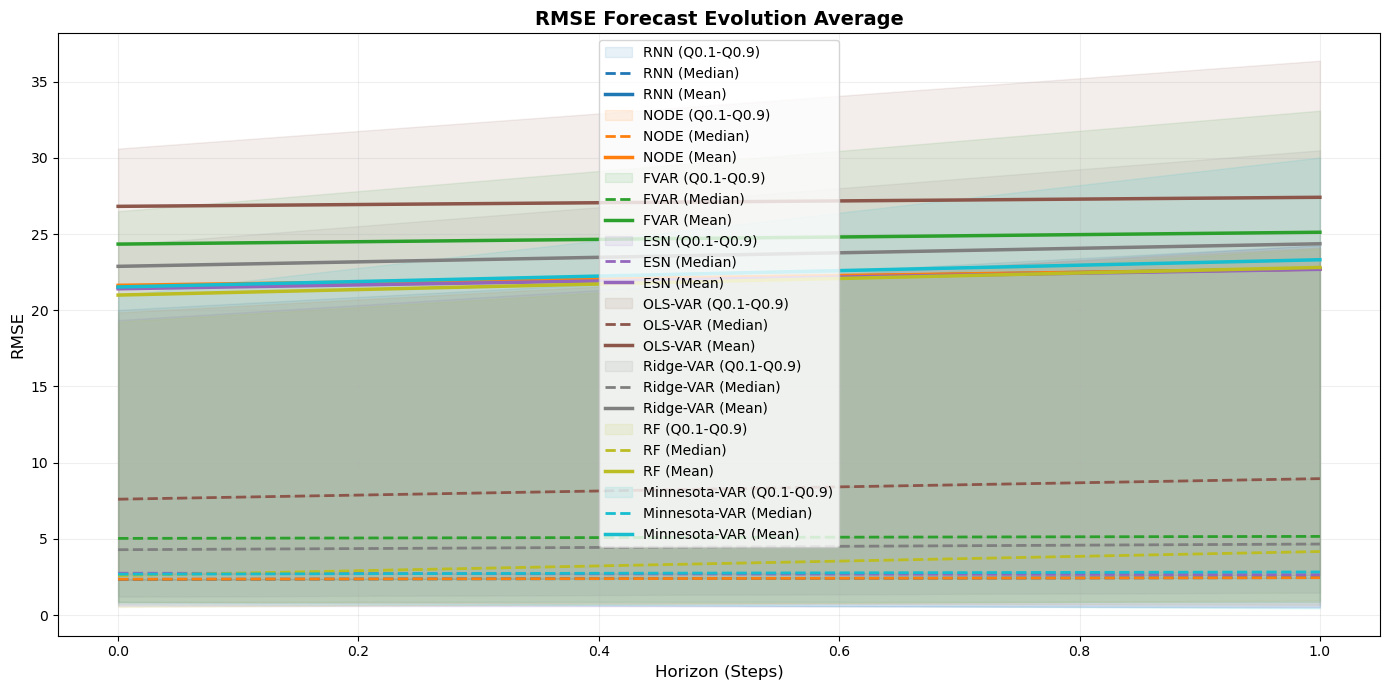

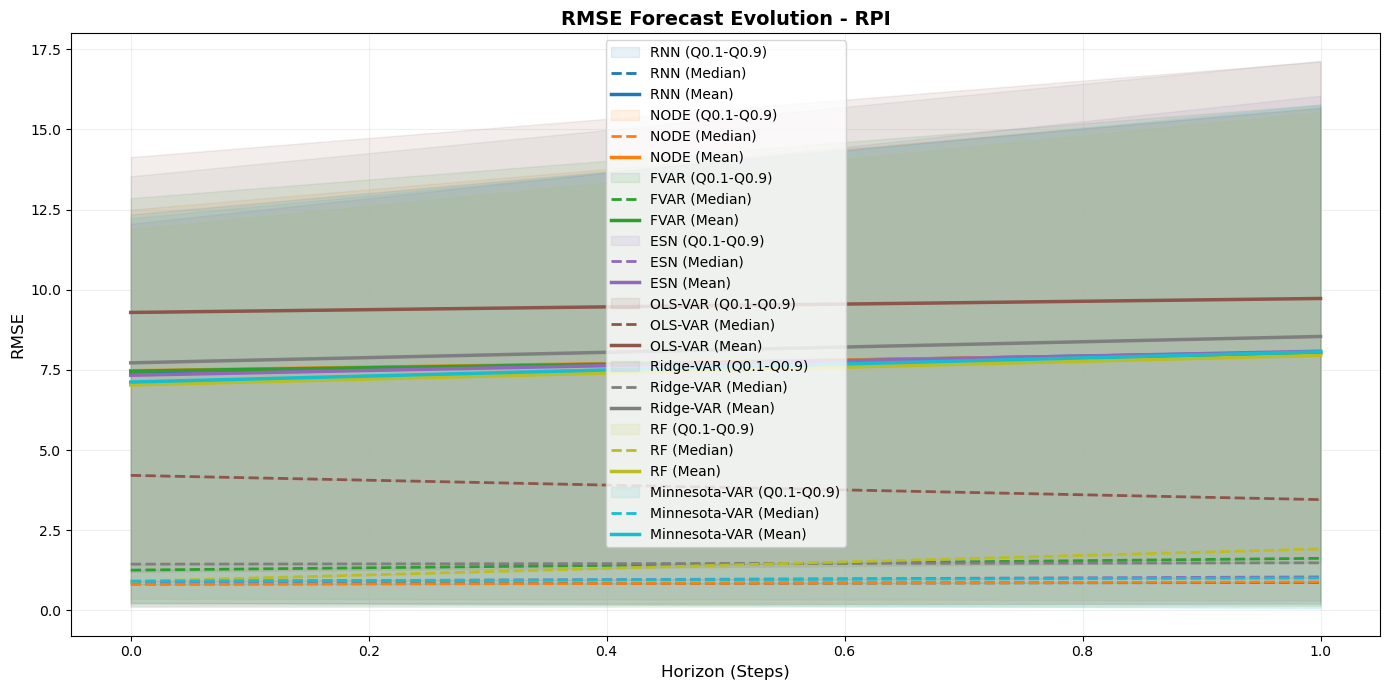

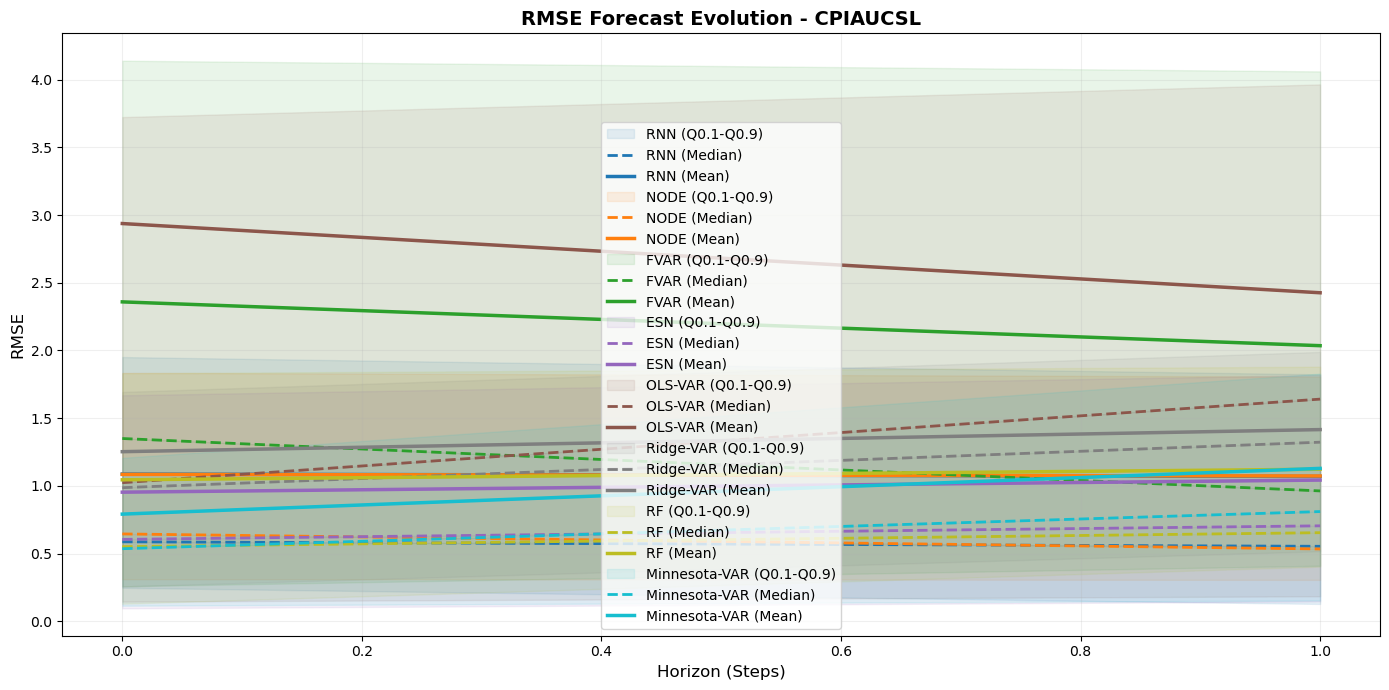

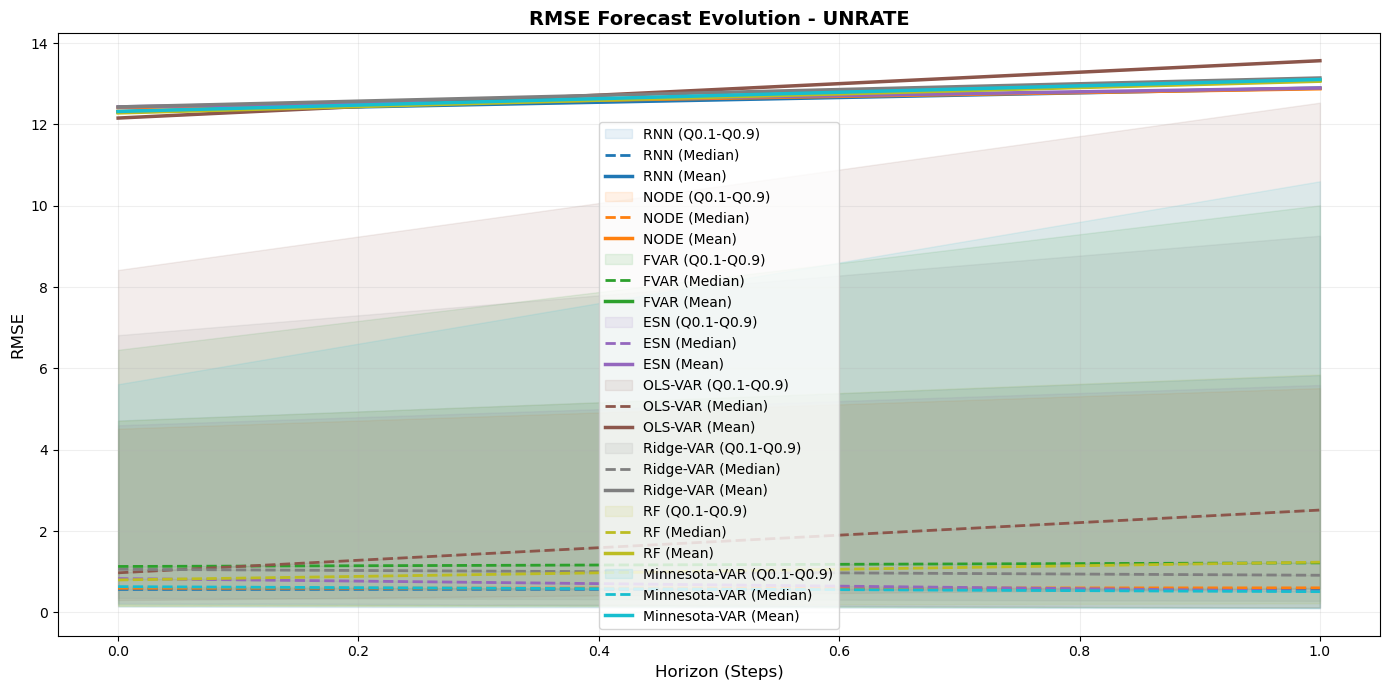

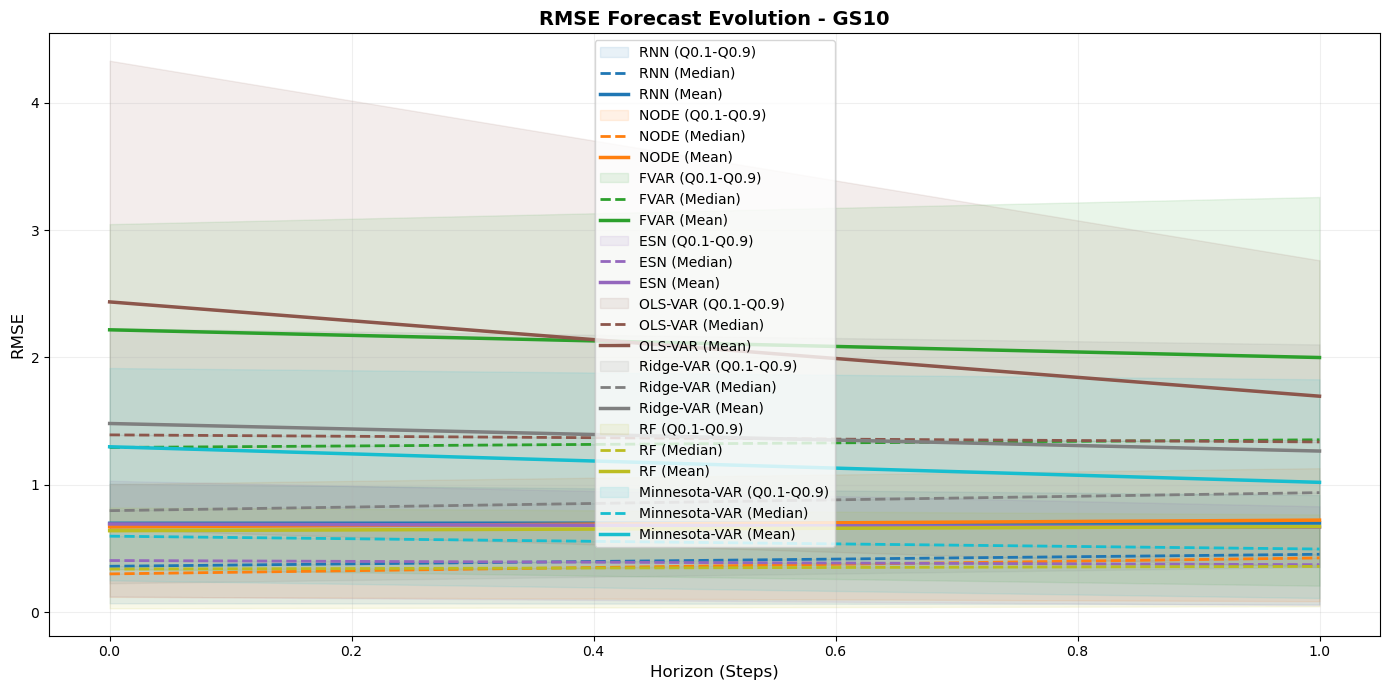

In [ ]:
from model import *
import numpy as np

import pandas as pd
data = pd.read_csv('fredmd/nice_fredmd.csv')
data.set_index('sasdate', inplace=True)
data.index = pd.to_datetime(data.index)
data = data[data.index >= "1970"]
data = data[data.index < "2022"]
cols_with_nan = data.columns[data.isna().any()].tolist()
if len(cols_with_nan) > 0:
    print(f"--- {len(cols_with_nan)} Colonnes with NaN to deleate ---")
    for col in cols_with_nan:
        print(f"- {col}")
else:
    print("No NaN detected.")
data = data.dropna(axis=1)

from dataloader import MacroDataLoader

X_col = list(data.columns)
Y_col = ['RPI', 'CPIAUCSL', 'UNRATE', 'GS10']
cfg = {
    'date_col': 'sasdate',
    'country_col': None,
    'target_col': Y_col,
    'features': X_col
}
loader = MacroDataLoader(data, cfg)

models_dict = {
    'RNN': build_rnn,
    'NODE': build_node,
    'FVAR': build_fvar,
    'ESN': build_esn_panel,
    'OLS-VAR': build_var,
    'Ridge-VAR': build_ridge_cv,
    'RF': build_rf_panel,
    'Minnesota-VAR': build_minnesota_ridge,
    }

from evaluator import UniFreqPanelMacroEvaluator

evaluator_crisis = UniFreqPanelMacroEvaluator(
    dataloader=loader,
    models_builders=models_dict,
    horizon=1,
    verbose=True,
    metric='rmse'
)

backtest_dates = pd.date_range(start='2020-01', periods=22, freq='ME')

results_crisis = evaluator_crisis.run_backtesting(
    end_train_date_list=backtest_dates,
    num_exp_by_fit=6
)

print('\n Average')

evaluator_crisis.print_significance_tests(results_crisis, target_idx=None, horizon_idx=0)

for i in range(len(cfg['target_col'])):
    print(cfg['target_col'][i])
    evaluator.print_significance_tests(results_crisis, target_idx=i, horizon_idx=0)
    print()

# evaluator.plot_compare_models(results_crisis, target_idx=None, title=f"RMSE Forecast Evolution Average")

# for i in range(len(cfg['target_col'])):
#     evaluator.plot_compare_models(results_crisis, target_idx=i, title=f"RMSE Forecast Evolution - {cfg['target_col'][i]}")